In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import torch
from pathlib import Path

##### File paths of trained models

In [7]:
path0 = Path("../training_outputs/d5_d_t_5_240223-103744.pt")
path1 = Path("../training_outputs/d5_d_t_5_240223-103813.pt")
path2 = Path("../training_outputs/d5_d_t_5_240223-135858.pt")
path3 = Path("../training_outputs/d5_d_t_5_240223-141910.pt")
path4 = Path("../training_outputs/d5_d_t_5_240223-154928.pt")
path5 = Path("../training_outputs/d5_d_t_5_240223-170614.pt")
path6 = Path("../training_outputs/d5_d_t_5_240226-180110.pt")
path7 = Path("../training_outputs/d5_d_t_5_240227-094415.pt")
path8 = Path("../training_outputs/d5_d_t_5_240227-151741.pt")
paths = [path6, path7, path8]

##### Load and plot

{'seed': None, 'dataset_size': 1000000, 'validation_set_size': 10000, 'batch_size': 30000, 'warmup_epochs': 300, 'tot_epochs': 800, 'gradient_factor': 2, 'warmup_lr': 0.001, 'lr': 0.0001, 'device': 'cuda', 'resume_training': False, 'current_epoch': 0}
{'seed': None, 'dataset_size': 1000000, 'validation_set_size': 10000, 'batch_size': 30000, 'warmup_epochs': 100, 'tot_epochs': 800, 'gradient_factor': 2, 'warmup_lr': 0.001, 'lr': 0.0001, 'device': 'cuda', 'resume_training': False, 'current_epoch': 0}
{'seed': None, 'dataset_size': 1000000, 'validation_set_size': 10000, 'batch_size': 20000, 'warmup_epochs': 0, 'tot_epochs': 800, 'gradient_factor': 2, 'warmup_lr': 0.001, 'lr': 0.0001, 'device': 'cuda', 'resume_training': False, 'current_epoch': 0}


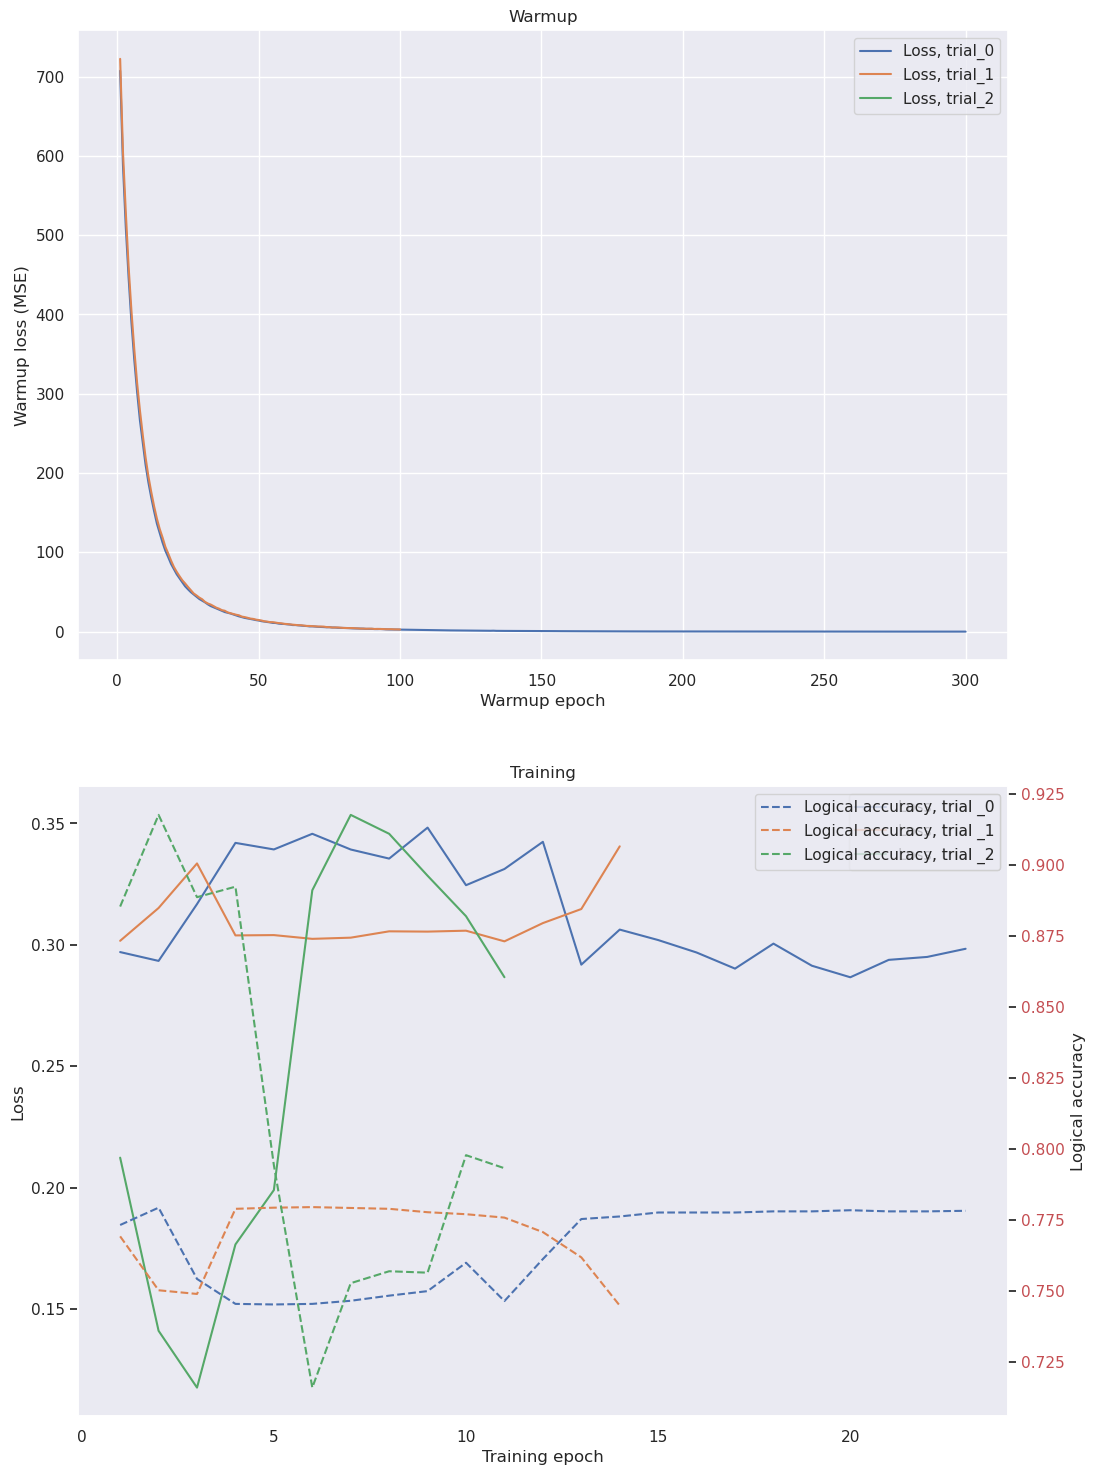

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(12, 18))

for i, path in enumerate(paths):

    training_data = torch.load(path, map_location="cpu")
    history = training_data["training_history"]
    settings = training_data["training_settings"]
    print(settings)

    train_loss = history["train_loss"]
    val_accuracy = history["val_accuracy"]
    n_epochs = history["epoch"] + 1

    if n_epochs > settings["warmup_epochs"]:
        x_warmup = range(1, settings["warmup_epochs"] + 1)
        ax[0].plot(x_warmup, train_loss[: settings["warmup_epochs"]], label=f"Loss, trial_{i}")
        ax[0].set_ylabel("Warmup loss (MSE)")
        ax[0].set_title("Warmup")
        ax[0].set_xlabel("Warmup epoch")
        ax[0].legend()

        if settings["warmup_epochs"] == 0:
            x = range(1, n_epochs + 1)
        else:
            x = range(1, n_epochs - settings["warmup_epochs"] + 2)
        ax[1].plot(x, train_loss[settings["warmup_epochs"]:], label=f"Loss, trial _{i}")
        
        
        if i == 0:
            r_ax = ax[1].twinx()
        r_ax.plot(x, val_accuracy[settings["warmup_epochs"]:], ls="--", label=f"Logical accuracy, trial _{i}")
        r_ax.set_ylabel("Logical accuracy")
        r_ax.tick_params(axis='y', labelcolor="r")
        ax[1].set_title("Training")
        ax[1].set_xlabel("Training epoch")
        ax[1].set_ylabel("Loss")
        
        r_ax.grid(False)
        ax[1].grid(False)
        ax[1].legend()
        r_ax.legend()
    else:
        x_warmup = range(1, n_epochs + 1)
        ax[0].plot(x_warmup, train_loss[: settings["warmup_epochs"]])